# ELE 435/535 Computational HW3: Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  Least Squares and Ridge Regression

### (1) Housing Dataset:

We will be working with a dataset that records house prices in the suburbs of Boston. The data contains 14 columns, the first 13 columns correspond to various housing features, such as "CRIM" (crime rate per capita), "RM" (average number of rooms), "TAX" (tax rate), etc. A more comprehensive description can be found at https://www.kaggle.com/c/boston-housing. The last column corresponds to the median value of owner-occupied homes in \$1000's. 

**1-a) Load the housing dataset**    
Form a matrix X with each column a feature, and a vector y of target values.

In [2]:
housing_data = np.loadtxt('housing.data')
X = np.matrix(housing_data[:,0:13])
y = np.matrix(housing_data[:,13]).T

**1-b) Examine the data**    
* Print the dimensions of X and the dimensions of y.
* Determine and print the number of features and the number of sample points.
* Compute and print the sample mean of the house features
* Compute and print the mean target value (mean house price).

In [3]:
# Your Code

print(f"Dimensions of X: {X.shape}.")
print(f"Dimensions of Y: {y.shape}.")

number_of_features = X.shape[1]
print(f"Number of features: {number_of_features}.")

number_of_sample_points = X.shape[0]
print(f"Number of sample points: {number_of_sample_points}.")

mean_house_features = X.mean(axis=0)
print(f"Mean house features: {mean_house_features}.")

mean_target_value = y.mean()
print(f"Mean target value: {mean_target_value}.")

Dimensions of X: (506, 13).
Dimensions of Y: (506, 1).
Number of features: 13.
Number of sample points: 506.
Mean house features: [[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
  5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
  9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
  1.26530632e+01]].
Mean target value: 22.532806324110677.


**1-c) Form a training set and a testing set**    
* Select the first 400 samples to be the training set
* The remaining samples (106) form the testing set.

In [4]:
# TRAINING AND TESTING DATA

np.random.seed(5787843)

training_size = 400
testing_size = number_of_sample_points - number_of_sample_points
# training_idx = np.random.choice(number_of_sample_points, training_size, replace=False)
training_idx = np.arange(training_size)
testing_idx = np.setdiff1d(np.arange(number_of_sample_points), training_idx)

X_train = X[training_idx, :]
y_train = y[training_idx]

X_test = X[testing_idx, :]
y_test = y[testing_idx]

**2-a) Write a function solve_ls( )**
* This takes X, y as arguments and returns the solution of: $(X^TX) w = X^T y$.
* Note: `X @ Y` performs the matrix multiplcation of matrices X and Y
* np.linalg.solve( ) may be useful
* Do not directly compute the inverse of a matrix.

In [5]:
# function solve_ls()

def solve_ls(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

**2-b Write a function MSE( )**    
* This takes w, X, y as inputs and returns the mean squared error that results from predicting target values $y = X w$ when the true value is $y$.

In [6]:
# function MSE()

def MSE(w, X, y):
    return np.mean(np.array(X @ w - y) ** 2)

**3-a) Linear Least Squares Regression**    
* Find a weighting vector w1 to predict house price (in 1000's) from the training feature values. 
* Print your answer for the vector w1.
* Compute and print the mean square prediction error on the training data and on the testing data using w1 (print using three decimal places)
* Do the results suggest that the predictor is underfitting or overfitting the training data?
* ANS: Overfitting.

In [7]:
# LINEAR LEAST SQUARES

w1 = solve_ls(X_train, y_train)
print(w1)
mse1_train = MSE(w1, X_train, y_train)
mse1_test = MSE(w1, X_test, y_test)
print(f"MSE on training data: {mse1_train:.3f}.")
print(f"MSE on testing data: {mse1_test:.3f}.")

[[-2.07803677e-01]
 [ 4.54598411e-02]
 [ 3.80540419e-02]
 [ 1.73671197e+00]
 [-2.48316331e+00]
 [ 6.29751631e+00]
 [-3.96993936e-03]
 [-9.44676797e-01]
 [ 3.76983123e-01]
 [-1.26846090e-02]
 [-4.50995418e-01]
 [ 1.11214277e-02]
 [-4.47627389e-01]]
MSE on training data: 23.561.
MSE on testing data: 35.814.


**3-b) Repeat part 3-a using Affine Least Squares Regression**    
* To do this add a column of 1's to X and reform the training and testing data.
* The command np.hstack( ) may be useful.
* Does this method improve the fit to the training data? ANS: Yes.
* Does it improve generalization? ANS: No.
* Is this method underfitting or overfitting the data? ANS: Overfitting.

In [8]:
# AFFINE LEAST SQUARES

X_train_affine = np.hstack((X_train, np.full((X_train.shape[0], 1), 1)))
X_test_affine = np.hstack((X_test, np.full((X_test.shape[0], 1), 1)))

w2 = solve_ls(X_train_affine, y_train)
print(w2)
mse2_train = MSE(w2, X_train_affine, y_train)
mse2_test = MSE(w2, X_test_affine, y_test)
print(f"MSE on training data: {mse2_train:.3f}.")
print(f"MSE on testing data: {mse2_test:.3f}.")

[[-1.91246374e-01]
 [ 4.42289967e-02]
 [ 5.52207977e-02]
 [ 1.71631351e+00]
 [-1.49957220e+01]
 [ 4.88773025e+00]
 [ 2.60921031e-03]
 [-1.29480799e+00]
 [ 4.84787214e-01]
 [-1.54006673e-02]
 [-8.08795026e-01]
 [-1.29230427e-03]
 [-5.17953791e-01]
 [ 2.86725996e+01]]
MSE on training data: 22.305.
MSE on testing data: 37.894.


**4-a) Z-scoring the Data**    
* Write a function 'get_zscore_data( )' that takes a (training dataset) X as input and returns the mean feature vector X_mu and the standard deviation X_std of the features about the mean. The commands X.mean( ) and X.std( ) may be useful.
* Write a second function 'zscore( )' that takes as input a dataset Z (with the same number of features as X) , X_mu and X_std and returns the Z-scored version of Z using X_mu and X_std. In the case of scalars the output would be (z-x_mu)/x_std.   
* In Python you can use broadcasting to do this operation in 1 short line of code.

In [9]:
# z-Score

def get_zscore_data(X):
    return X.mean(axis=0), X.std(axis=0)

def zscore(Z):
    X_mean, X_std = get_zscore_data(Z)
    return (Z - X_mean) / X_std

**4-b) Fitting the Z-scored Data**        
* Compute the mean and standard deviation of the features in the **training data**.
* Use these to z-score the training data and the testing data.
* Compute the mean of the training target values. Subtract this from the training target values.
* Use linear least squares (not affine) to fit "w3" mapping the z-scored training data to the centered training targets.
* The predictor on the training data is now: (X_train_zscore)w3 + y_train_mean
* The predictor on the testing data is now: (X_testing_zscore)w3  + y_train_mean (use training data mean and std to zcore testing data)
* In each case, compute the resulting MSE. Your results using this method should exactly match those in part 3-b. 
* We can examine the MSE when our prediction is just the overall mean house price of the training data by using w=0. Do this for the training data and testing data and print the results.

In [10]:
# Z-SCORING USING THE TRAINING DATA

X_train_mean, X_train_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_zscored = (X_train - X_train_mean) / X_train_std
X_test_zscored = (X_test - X_train_mean) / X_train_std
y_train_mean = y_train.mean()
y_train_centered = y_train - y_train_mean
y_test_centered = y_test - y_train_mean
w3 = solve_ls(X_train_zscored, y_train_centered)
# print(w3)
mse3_train = MSE(w3, X_train_zscored, y_train_centered)
mse3_test = MSE(w3, X_test_zscored, y_test_centered)
mse3_train_w0 = MSE(0 * w3, X_train_zscored, y_train_centered)
mse3_test_w0 = MSE(0 * w3, X_test_zscored, y_test_centered)
print(f"MSE on training data: {mse3_train:.3f}.")
print(f"MSE on testing data: {mse3_test:.3f}.")
print(f"MSE on training data (w=0): {mse3_train_w0:.3f}.")
print(f"MSE on testing data (w=0): {mse3_test_w0:.3f}.")

MSE on training data: 22.305.
MSE on testing data: 37.894.
MSE on training data (w=0): 83.807.
MSE on testing data (w=0): 102.227.


**5-a) Ridge Regression**       
Perform the compuations in 4-b again, using ridge regression in place of least squares. Use a regularization parameter $\lambda$. 
* Do the regression computations in a loop for $\lambda$ in 0,10, 20,...600. 
* Plot the training MSE and testing MSE versus $\lambda$. Label the axis, provide a title, and use a legend.
* You should notice something special about the testing curve. Does it indicate that selecting a good value of $\lambda$  is important? If so why? Yes. A carefully selected $\lambda$ could significantly reduce the MSE on the testing data.
* But we can't use the testing data to select $\lambda$! We need to do this using the training data.

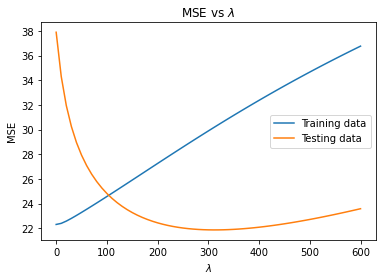

In [11]:
# RIDGE REGRESSION ON Z-SCORED DATA

# def solve_ls_ridge(X, y, lambdas):
#    return np.linalg.solve(
#        np.broadcast_to(X.T @ X, (lambdas.shape[0], X.shape[1], X.shape[1])) +
#        (lambdas * np.broadcast_to(np.eye(X.shape[1]), (lambdas.shape[0], X.shape[1], X.shape[1])).T).T,
#        np.broadcast_to(X.T @ y, (lambdas.shape[0], X.shape[1], 1))
#    )

def MSE_ridge(w, X, y):
    return (np.array((X @ w).T - y) ** 2).mean(axis=0)

lambdas = np.arange(0,610,10)
w4 = np.array(
    [
        solve_ls(
            np.vstack((X_train_zscored, np.sqrt(lamb) * np.eye(X_train_zscored.shape[1]))),
            np.vstack((y_train_centered, np.zeros((X_train_zscored.shape[1], 1))))
        )
        for lamb in lambdas
    ]
)

mse4_train = MSE_ridge(w4, X_train_zscored, y_train_centered)
mse4_test = MSE_ridge(w4, X_test_zscored, y_test_centered)
plt.plot(lambdas, mse4_train, label="Training data")
plt.plot(lambdas, mse4_test, label="Testing data")
plt.xlabel(r"$\lambda$")
plt.ylabel("MSE")
plt.title(r"MSE vs $\lambda$")
plt.legend()
plt.show()

**5-b) Validation Data and Hyperparameter Selection**    
To select a value for $\lambda$ (a hyperparamter) we can partition the training set (400 examples) into a smaller training set (300 examples) and a validation set (100 examples), leaving the testing set (106 examples) alone.    
* Execute the partition of the existing training data (before z-scoring)
* Repeat the computations in part 4-b using the new training data. This time compute MSE performance on the training set, the validation set, and the testing set. 
* Plot the curves of training MSE, validation MSE and testing MSE versus $\lambda.$
* Plot the testing MSE for Least Squares and Affine Least Squares on the same plot as horizontal lines.
* Since the validation data is training data you can use the results for validation performace to select a value for $\lambda.$
* What is a good choice for $\lambda$ based on the validation MSE? $\lambda = 500$ (see the printed value below).
* Using this value for $\lambda$ what is the expected testing performance? Is this performance better that the least squares (linear and affine) results in 3-a and 3-b? The MSE on the testing set is $18.810$ (see the printed value below), which is better than the one in 3-a and 3-b.

In [12]:
partition_training_size = 300
partition_validation_size = training_size - partition_training_size
# partition_training_idx = np.random.choice(training_size, partition_training_size, replace=False)
partition_training_idx = np.arange(partition_training_size)
partition_validation_idx = np.setdiff1d(np.arange(training_size), partition_training_idx)

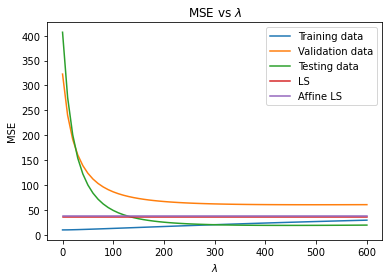

Lambda for minimal MSE on validation data: 500.
Lambda for minimal MSE on validation data: 18.810.


In [13]:
# RIDGE REGRESSION WITH VALIDATION DATA

X_partition_train = X[partition_training_idx, :]
y_partition_train = y[partition_training_idx]

X_partition_valid = X[partition_validation_idx, :]
y_partition_valid = y[partition_validation_idx]

X_partition_train_mean, X_partition_train_std = X_partition_train.mean(axis=0), X_partition_train.std(axis=0)
X_partition_train_zscored = (X_partition_train - X_partition_train_mean) / X_partition_train_std
X_partition_valid_zscored = (X_partition_valid - X_partition_train_mean) / X_partition_train_std
X_partition_test_zscored = (X_test - X_partition_train_mean) / X_partition_train_std

y_partition_train_mean = y_partition_train.mean()
y_partition_train_centered = y_partition_train - y_partition_train_mean
y_partition_valid_centered = y_partition_valid - y_partition_train_mean
y_partition_test_centered = y_test - y_partition_train_mean

lambdas = np.arange(0, 610, 10)
w5 = np.array(
    [
        solve_ls(
            np.vstack((X_partition_train_zscored, np.sqrt(lamb) * np.eye(X_partition_train_zscored.shape[1]))),
            np.vstack((y_partition_train_centered, np.zeros((X_partition_train_zscored.shape[1], 1))))
        )
        for lamb in lambdas
    ]
)
mse5_train = MSE_ridge(w5, X_partition_train_zscored, y_partition_train_centered)
mse5_valid = MSE_ridge(w5, X_partition_valid_zscored, y_partition_valid_centered)
mse5_test = MSE_ridge(w5, X_partition_test_zscored, y_partition_test_centered)
plt.plot(lambdas, mse5_train, label="Training data")
plt.plot(lambdas, mse5_valid, label="Validation data")
plt.plot(lambdas, mse5_test, label="Testing data")
plt.plot(lambdas, np.repeat(mse1_test, mse5_valid.shape[0]), label="LS")
plt.plot(lambdas, np.repeat(mse2_test, mse5_valid.shape[0]), label="Affine LS")
plt.xlabel(r"$\lambda$")
plt.ylabel("MSE")
plt.title(r"MSE vs $\lambda$")
plt.legend()
plt.show()
lambda_argmin_idx = np.argmin(mse5_valid)
lambda_argmin = lambdas[lambda_argmin_idx]
print(f"Lambda for minimal MSE on validation data: {lambda_argmin}.")
print(f"Lambda for minimal MSE on validation data: {mse5_test[lambda_argmin_idx]:.3f}.")